# Quantum tomography GHZ-checker

Check for the hidden state is GHZ state or not?

<img src='others/binho_checkstate.png' width = 500px/>

It looks like W state case:

<img src='others/check_ghz_state.png'/>

In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.qtm_1qubit

In [2]:
# Init parameters
num_qubits = 3
# For arbitrary initial state
num_layers = 3
# For determine GHZ state
theta = np.random.uniform(0, 2*np.pi)

thetas_origin = np.random.uniform(low = 0, high = 2*np.pi, size = num_qubits*15)


In [4]:
thetas = thetas_origin.copy()

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetas, loss_values_sgd = qtm.base_qtm.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.create_GHZchecker_arbitrary, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.sgd,
    verbose = 1,
    num_layers = num_layers,
    theta = theta
)


Step: 100%|██████████| 150/150 [16:54<00:00,  6.76s/it]


In [5]:
thetas = thetas_origin.copy()

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetas, loss_values_adam = qtm.base_qtm.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.create_GHZchecker_arbitrary, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.adam,
    verbose = 1,
    num_layers = num_layers,
    theta = theta
)


Step: 100%|██████████| 150/150 [14:49<00:00,  5.93s/it]


In [6]:
thetas = thetas_origin.copy()

qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetas, loss_values_qng= qtm.base_qtm.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.create_GHZchecker_arbitrary, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.qng,
    verbose = 1,
    num_layers = num_layers,
    theta = theta
)


Step: 100%|██████████| 150/150 [16:10<00:00,  6.47s/it]


In [7]:
thetas = thetas_origin.copy()
print(thetas)
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
thetas, loss_values_qng_adam= qtm.base_qtm.fit(
    qc, num_steps = 150, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.create_GHZchecker_arbitrary, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.qng_adam,
    verbose = 1,
    num_layers = num_layers,
    theta = theta
)


[1.97245649 4.12868842 5.50204005 0.75911407 2.08423196 2.83074179
 4.95689085 1.53462631 6.20560541 4.88902227 4.73982456 0.61636073
 5.26301216 2.8214415  4.11696658 4.1913765  3.80583258 5.47715322
 2.18127268 0.0669309  1.87531558 2.36657038 4.49837509 0.77660791
 1.85415211 4.29361761 5.15563835 0.30791855 1.07911419 2.34302573
 5.74277693 4.95310622 3.71507248 2.67823025 3.84583513 3.30022725
 5.59825576 5.36802925 4.82584902 4.08550756 2.10187826 0.19464688
 5.50244251 5.41159531 4.36073071]


Step: 100%|██████████| 150/150 [15:42<00:00,  6.28s/it]


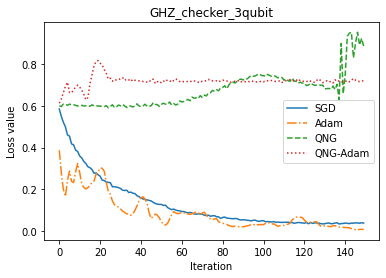

In [8]:

# Plot loss value in 100 steps
plt.plot(loss_values_sgd, label='SGD', linestyle = '-')
plt.plot(loss_values_adam, label='Adam', linestyle = '-.')
plt.plot(loss_values_qng, label='QNG', linestyle = '--')
plt.plot(loss_values_qng_adam, label='QNG-Adam', linestyle = ':')
plt.title('GHZ_checker_3qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('GHZ_checker_3qubit.png', format='png', dpi=600)
plt.show() 

np.savetxt("./compare/GHZ_checker_3qubit/loss_values_sgd.csv", loss_values_sgd, delimiter=",")
np.savetxt("./compare/GHZ_checker_3qubit/loss_values_adam.csv", loss_values_adam, delimiter=",")
np.savetxt("./compare/GHZ_checker_3qubit/loss_values_qng.csv", loss_values_qng, delimiter=",")
np.savetxt("./compare/GHZ_checker_3qubit/loss_values_qng_adam.csv", loss_values_qng_adam, delimiter=",")